-----------
E-value threshold: 1e-05
Original num hits:  23666
Number of unique hits after removing duplicates:  23394
Conflicts:                                              0                    1       2   \
3                 A0A0G2KBC9|reviewed|Leukocyte   KI2S5_HUMAN/35-113  29.787   
4                 A0A0G2KBC9|reviewed|Leukocyte   KI2S5_HUMAN/35-113  28.750   
7                 A0A0G2KBC9|reviewed|Leukocyte   KI3L1_HUMAN/35-108  26.316   
8                 A0A0G2KBC9|reviewed|Leukocyte   KI3L1_HUMAN/35-108  24.590   
9                 A0A0G2KBC9|reviewed|Leukocyte   KI3L1_HUMAN/35-108  25.641   
...                                         ...                  ...     ...   
23660                 O74536|reviewed|SNF1-like   IGHM_CHICK/223-309  75.000   
23661  Q9HBY8|reviewed|Serine/threonine-protein  SEM3E_MOUSE/588-667  33.333   
23662  Q9HBY8|reviewed|Serine/threonine-protein  SEM3E_MOUSE/588-667  33.333   
23664  Q6PGN3|reviewed|Serine/threonine-protein   IGHM_CHICK/223-309  

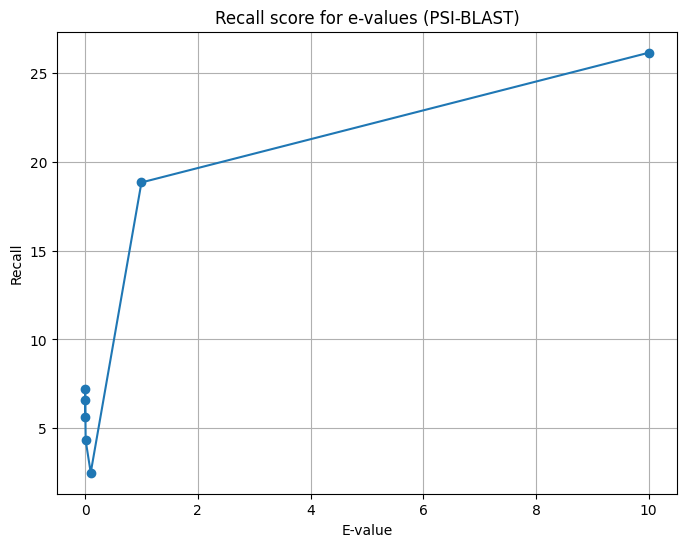

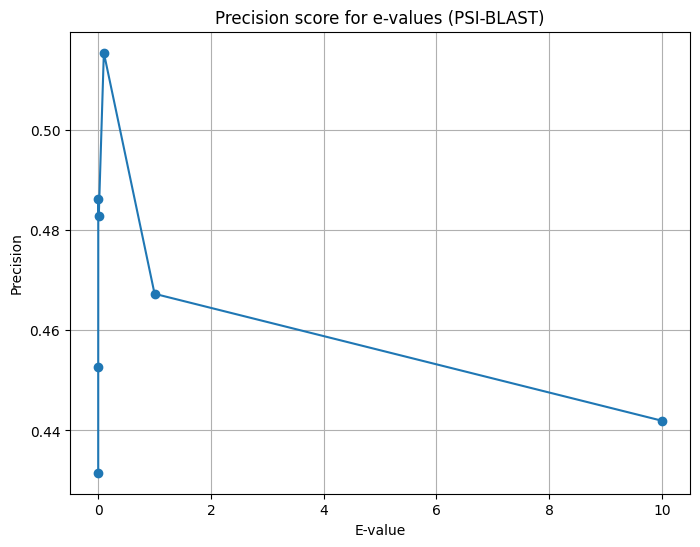

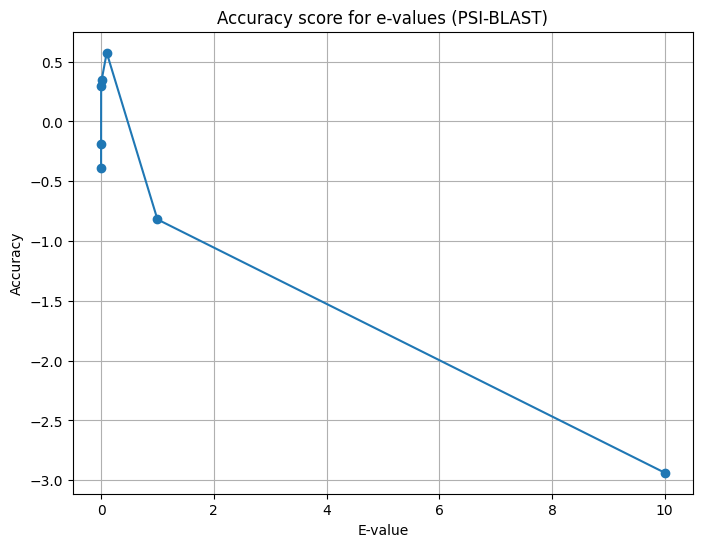

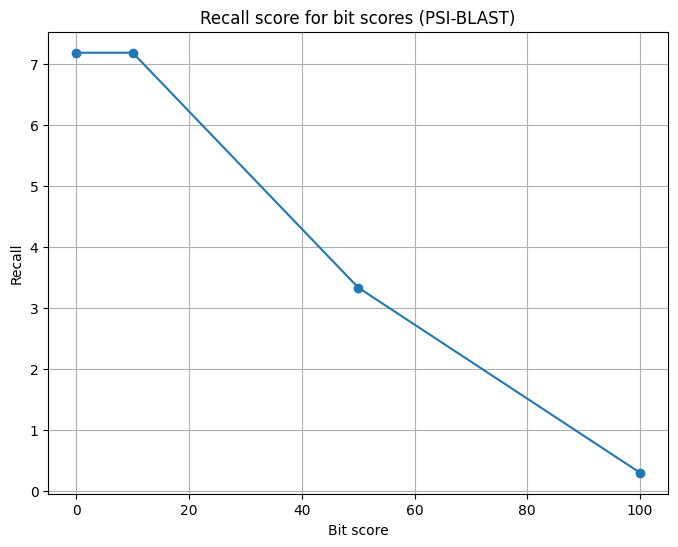

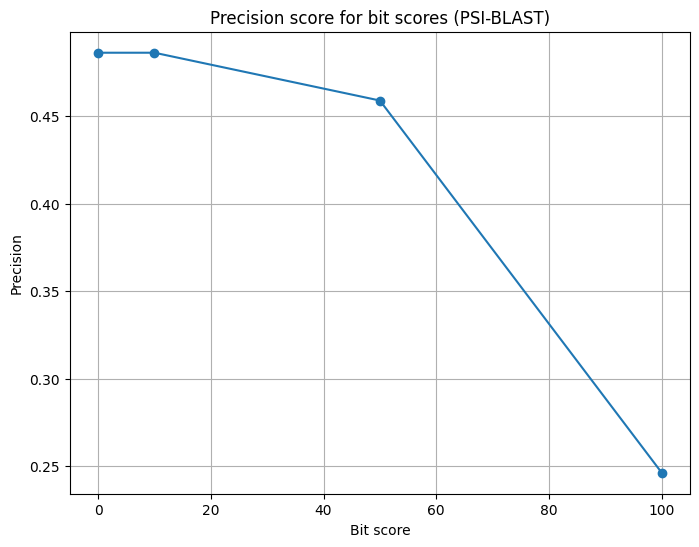

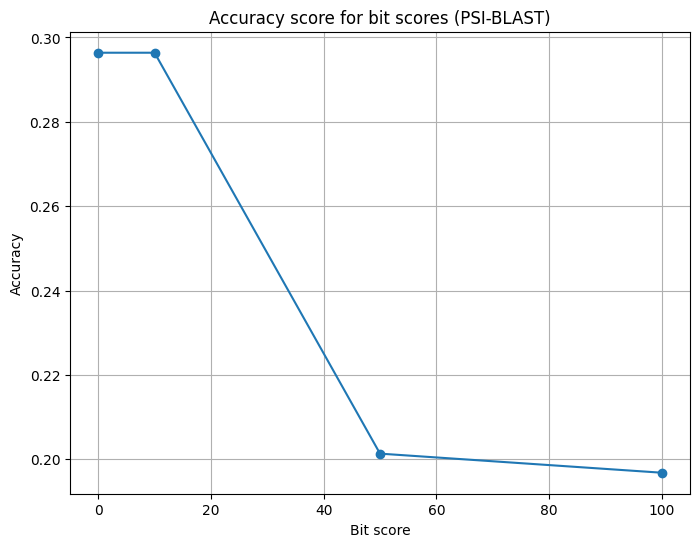

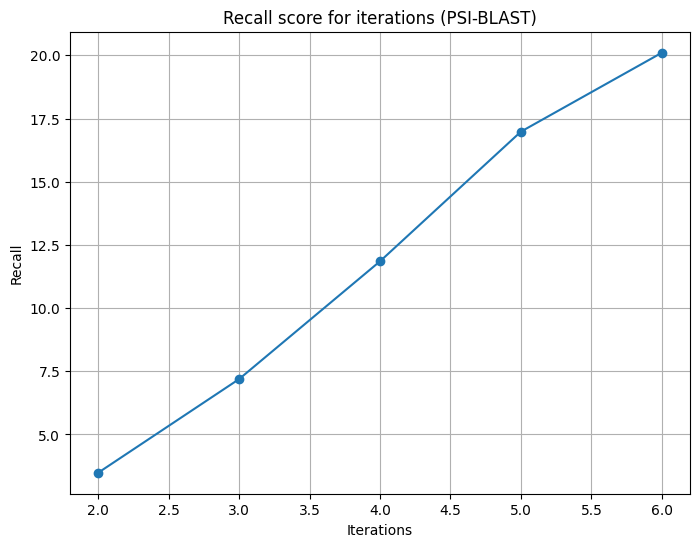

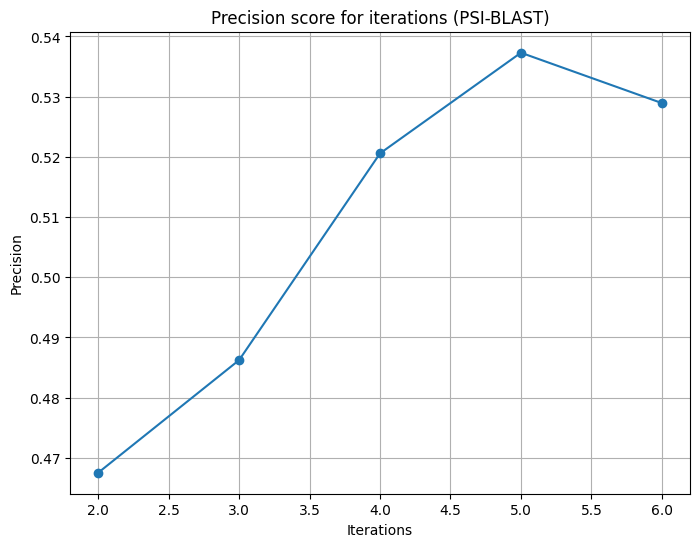

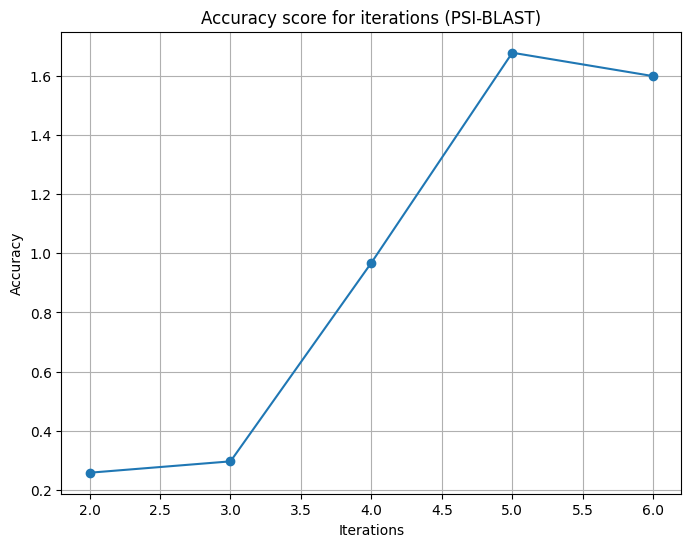

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# all output files listed below are in the folder 'psi_outputs'
files = {
    'evalue': [
        'psi_3_0.00001.txt', 'psi_3_0.0001.txt', 'psi_3_0.001.txt', 'psi_3_0.01.txt', 'psi_3_0.1.txt', 'psi_3_1.txt', 'psi_3_10.txt'
    ],
    'bit_score': [
        'psi_3_0.001_bit_0.txt', 'psi_3_0.001_bit_10.txt', 'psi_3_0.001_bit_50.txt', 'psi_3_0.001_bit_100.txt'
    ],
    'num_iterations': [
        'psi_2_0.001.txt', 'psi_3_0.001.txt', 'psi_4_0.001.txt', 'psi_5_0.001.txt', 'psi_6_0.001.txt'
    ]
}

def clean_txt(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    with open(file, 'w') as f:
        for line in lines:
            if not line.startswith('#'):
                f.write(line)

def stats_eval(e_val):
    print("-----------")
    if e_val == 0.00001:
        file = files['evalue'][4]
    elif e_val == 0.0001:
        file = files['evalue'][3]
    elif e_val == 0.001:
        file = files['evalue'][2]
    elif e_val == 0.01:
        file = files['evalue'][1]
    elif e_val == 0.1:
        file = files['evalue'][0]
    elif e_val == 1:
        file = files['evalue'][5]
    elif e_val == 10:
        file = files['evalue'][6]
    else:
        print(f"Error: Invalid e-value {e_val}")
        return

    print(f"E-value threshold: {e_val}")
    clean_txt(file)
    df = pd.read_csv(file, sep='\s+', comment='#', header=None)
    print("Original num hits: ", df.shape[0])

    df = df.drop_duplicates()
    print("Number of unique hits after removing duplicates: ", df.shape[0])

    conflicts = df[df[10] > e_val]
    if conflicts.empty:
        print(f"No conflicts.")
    else:
        print(f"Conflicts: {conflicts}")
        print("num conflicts: ", conflicts.shape[0])
    df.drop(conflicts.index, inplace=True)
    print("Filtered num hits: ", df.shape[0])

    pos_hits = df[df[0].str.endswith("|P") | df[1].str.endswith("|P")].drop_duplicates()
    negF_hits = df[df[0].str.endswith("|NF") | df[1].str.endswith("|NF")].drop_duplicates()
    negK_hits = df[df[0].str.endswith("|NK") | df[1].str.endswith("|NK")].drop_duplicates()

    print("False positives of F:", negF_hits.shape[0])
    print("False positives of K:", negK_hits.shape[0])

    true_neg = 221 - negF_hits.shape[0] - negK_hits.shape[0]
    false_neg = 221 - pos_hits.shape[0]

    return [pos_hits.shape[0], negF_hits.shape[0] + negK_hits.shape[0], true_neg, false_neg]

def stats_bit(bit_score):
    print("-----------")
    if bit_score == 0:
        file = files['bit_score'][0]
    elif bit_score == 10:
        file = files['bit_score'][1]
    elif bit_score == 50:
        file = files['bit_score'][2]
    elif bit_score == 100:
        file = files['bit_score'][3]
    else:
        print(f"Error: Invalid bit score {bit_score}")
        return

    print(f"Bit score threshold: {bit_score}")
    clean_txt(file)
    df = pd.read_csv(file, sep='\s+', comment='#', header=None)
    print("Original num hits: ", df.shape[0])

    df = df.drop_duplicates()
    print("Number of unique hits after removing duplicates: ", df.shape[0])

    filtered_df = df[df[11] >= bit_score]
    print(f"Filtered num hits (bit score >= {bit_score}): ", filtered_df.shape[0])

    pos_hits = df[df[0].str.endswith("|P") | df[1].str.endswith("|P")].drop_duplicates()
    negF_hits = df[df[0].str.endswith("|NF") | df[1].str.endswith("|NF")].drop_duplicates()
    negK_hits = df[df[0].str.endswith("|NK") | df[1].str.endswith("|NK")].drop_duplicates()

    print("False positives of F:", negF_hits.shape[0])
    print("False positives of K:", negK_hits.shape[0])

    true_neg = 221 - negF_hits.shape[0] - negK_hits.shape[0]
    false_neg = 221 - pos_hits.shape[0]

    return [pos_hits.shape[0], negF_hits.shape[0] + negK_hits.shape[0], true_neg, false_neg]

def stats_iter(iter_num):
    print("-----------")
    if iter_num == 2:
        file = files['num_iterations'][0]
    elif iter_num == 3:
        file = files['num_iterations'][1]
    elif iter_num == 4:
        file = files['num_iterations'][2]
    elif iter_num == 5:
        file = files['num_iterations'][3]
    elif iter_num == 6:
        file = files['num_iterations'][4]
    else:
        print(f"Error: Invalid iteration number {iter_num}")
        return

    print(f"Iteration number: {iter_num}")
    clean_txt(file)
    df = pd.read_csv(file, sep='\s+', comment='#', header=None)
    print("Original num hits: ", df.shape[0])

    df = df.drop_duplicates()
    print("Number of unique hits after removing duplicates: ", df.shape[0])

    pos_hits = df[df[0].str.endswith("|P") | df[1].str.endswith("|P")].drop_duplicates()
    negF_hits = df[df[0].str.endswith("|NF") | df[1].str.endswith("|NF")].drop_duplicates()
    negK_hits = df[df[0].str.endswith("|NK") | df[1].str.endswith("|NK")].drop_duplicates()

    print("False positives of F:", negF_hits.shape[0])
    print("False positives of K:", negK_hits.shape[0])

    true_neg = 221 - negF_hits.shape[0] - negK_hits.shape[0]
    false_neg = 221 - pos_hits.shape[0]

    return [pos_hits.shape[0], negF_hits.shape[0] + negK_hits.shape[0], true_neg, false_neg]

def acc_p_r():
    acc = []
    prec = []
    recall = []
    e_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
    bit_scores = [0, 10, 50, 100]
    iterations = [2, 3, 4, 5, 6]

    for i in e_values:
        s = stats_eval(i)
        # acc.append((s[0] + s[2]) / 442)
        acc.append((s[0] + s[2]) / (s[0] + s[1] + s[2] + s[3]))
        prec.append(s[0] / (s[0] + s[1]))
        recall.append(s[0] / (s[0] + s[3]))

    for i in bit_scores:
        s = stats_bit(i)
        # acc.append((s[0] + s[2]) / 442)
        acc.append((s[0] + s[2]) / (s[0] + s[1] + s[2] + s[3]))
        prec.append(s[0] / (s[0] + s[1]))
        recall.append(s[0] / (s[0] + s[3]))

    for i in iterations:
        s = stats_iter(i)
        # acc.append((s[0] + s[2]) / 442)
        acc.append((s[0] + s[2]) / (s[0] + s[1] + s[2] + s[3]))
        prec.append(s[0] / (s[0] + s[1]))
        recall.append(s[0] / (s[0] + s[3]))

    return acc, prec, recall

def plot_graphs():
    acc, prec, recall = acc_p_r()

    # e-value graphs
    plt.figure(figsize=(8, 6))
    plt.plot([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], recall[:7], marker='o')
    plt.title(f'Recall score for e-values (PSI-BLAST)')
    plt.xlabel('E-value')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], prec[:7], marker='o')
    plt.title(f'Precision score for e-values (PSI-BLAST)')
    plt.xlabel('E-value')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10], acc[:7], marker='o')
    plt.title(f'Accuracy score for e-values (PSI-BLAST)')
    plt.xlabel('E-value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    # bit score graphs
    plt.figure(figsize=(8, 6))
    plt.plot([0, 10, 50, 100], recall[7:11], marker='o')
    plt.title(f'Recall score for bit scores (PSI-BLAST)')
    plt.xlabel('Bit score')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot([0, 10, 50, 100], prec[7:11], marker='o')
    plt.title(f'Precision score for bit scores (PSI-BLAST)')
    plt.xlabel('Bit score')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot([0, 10, 50, 100], acc[7:11], marker='o')
    plt.title(f'Accuracy score for bit scores (PSI-BLAST)')
    plt.xlabel('Bit score')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    # iteration graphs
    plt.figure(figsize=(8, 6))
    plt.plot([2, 3, 4, 5, 6], recall[11:], marker='o')
    plt.title(f'Recall score for iterations (PSI-BLAST)')
    plt.xlabel('Iterations')
    plt.ylabel('Recall')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot([2, 3, 4, 5, 6], prec[11:], marker='o')
    plt.title(f'Precision score for iterations (PSI-BLAST)')
    plt.xlabel('Iterations')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot([2, 3, 4, 5, 6], acc[11:], marker='o')
    plt.title(f'Accuracy score for iterations (PSI-BLAST)')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

plot_graphs()
